# 📘 Notebook 1a — Reference Data Exploration (MiD, KBA, GDV, Regional Structure)

**Goal:**  
Establish empirical reference distributions for the synthetic auto insurance dataset using German mobility, regional, and insurance statistics.

**Tasks:**
1. Environment setup and folder preparation  
2. Construct **regional vehicle distribution** (KBA reference)  
3. Derive **driver age** and **annual mileage** distributions (MiD)  
4. Define **vehicle type** structure (KBA)  
5. Calibrate **claim frequency** and **severity** levels (GDV)  
6. Build **regional vehicle mix adjustments** for segment realism  
7. Export all reference tables to `data/reference/`  
8. Summarize and visualize key empirical distributions  

In [1]:
# %% ===============================================================
# STEP 0 — ENVIRONMENT SETUP
# ===============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

# Directory setup
BASE_DIR = Path("..")
DATA_REF = BASE_DIR / "data" / "reference"
FIGURES = BASE_DIR / "outputs" / "figures"

for p in [DATA_REF, FIGURES]:
    p.mkdir(parents=True, exist_ok=True)

print("✅ Environment setup complete.")

✅ Environment setup complete.


,region,region_name,pkw_share,urban_density
0,NW,North Rhine-Westphalia,0.215,urban
1,BY,Bavaria,0.170,suburban
2,BW,Baden-Württemberg,0.143,urban
3,NI,Lower Saxony,0.103,suburban
4,HE,Hesse,0.081,suburban
5,RP,Rhineland-Palatinate,0.051,rural
6,SN,Saxony,0.054,rural
7,SH,Schleswig-Holstein,0.036,suburban
8,BE,Berlin,0.025,urban
9,BB,Brandenburg,0.028,rural


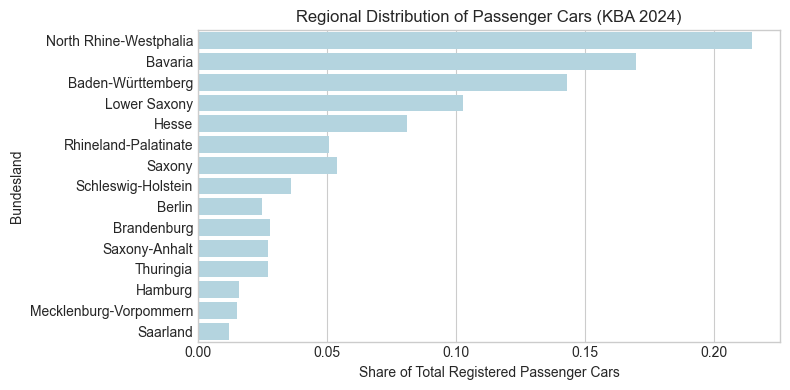

💾 Saved region_pkw_distribution.csv


In [2]:
# %% ===============================================================
# STEP 1 — REGIONAL VEHICLE DISTRIBUTION (KBA Reference)
# ===============================================================
# Reference Source:
# Kraftfahrt-Bundesamt (KBA) – Fahrzeugbestand am 1. Januar 2024.
# Shares of registered passenger cars (Pkw) by Bundesland.

region_data = pd.DataFrame({
    "region": ["NW","BY","BW","NI","HE","RP","SN","SH","BE","BB","ST","TH","HH","MV","SL"],
    "region_name": [
        "North Rhine-Westphalia","Bavaria","Baden-Württemberg","Lower Saxony","Hesse",
        "Rhineland-Palatinate","Saxony","Schleswig-Holstein","Berlin","Brandenburg",
        "Saxony-Anhalt","Thuringia","Hamburg","Mecklenburg-Vorpommern","Saarland"
    ],
    "pkw_share": [0.215,0.170,0.143,0.103,0.081,0.051,0.054,0.036,0.025,0.028,0.027,0.027,0.016,0.015,0.012],
    "urban_density": [
        "urban","suburban","urban","suburban","suburban","rural","rural","suburban",
        "urban","rural","rural","rural","urban","rural","suburban"
    ]
})

display(region_data)

plt.figure(figsize=(8,4))
sns.barplot(x="pkw_share", y="region_name", data=region_data, color="lightblue")
plt.title("Regional Distribution of Passenger Cars (KBA 2024)")
plt.xlabel("Share of Total Registered Passenger Cars")
plt.ylabel("Bundesland")
plt.tight_layout()
plt.savefig(FIGURES / "region_pkw_distribution.png")
plt.show()

region_data.to_csv(DATA_REF / "region_pkw_distribution.csv", index=False)
print("💾 Saved region_pkw_distribution.csv")

,age_bin,probability
0,18,0.05
1,23,0.08
2,28,0.15
3,33,0.17
4,38,0.18
5,43,0.14
6,48,0.10
7,53,0.08
8,58,0.05


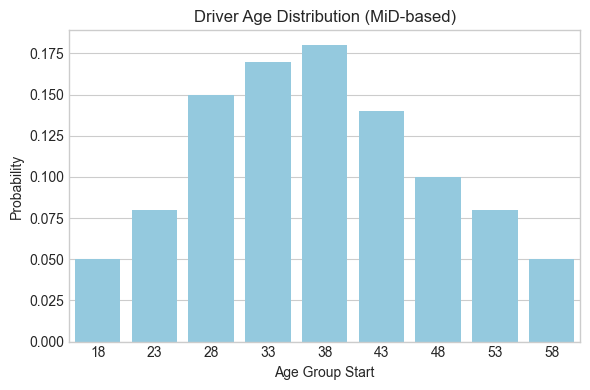

💾 Saved driver_age_distribution.csv


In [3]:
# %% ===============================================================
# STEP 2 — DRIVER AGE DISTRIBUTION (MiD Reference)
# ===============================================================
# Reference Source:
# Mobilität in Deutschland (MiD) survey, BMVI, 2017/2023 waves.
# Age structure of active car drivers, approximated from published
# summary tables (https://www.mobilitaet-in-deutschland.de).
#
# The age shares below reproduce the typical "bell-shaped" pattern
# observed in MiD, peaking around 35–45 years.

# keep the shares as provided
age_shares = np.array([0.05, 0.08, 0.15, 0.17, 0.18, 0.14, 0.10, 0.08, 0.05])  # sums ~1.0

# generate age bin starts to match the number of share entries
age_bins = np.arange(18, 18 + 5 * len(age_shares), 5)
driver_age = pd.DataFrame({
    "age_bin": age_bins,
    "probability": age_shares / age_shares.sum()
})

display(driver_age)

plt.figure(figsize=(6, 4))
sns.barplot(x="age_bin", y="probability", data=driver_age, color="skyblue")
plt.title("Driver Age Distribution (MiD-based)")
plt.xlabel("Age Group Start")
plt.ylabel("Probability")
plt.tight_layout()
plt.savefig(FIGURES / "driver_age_distribution.png")
plt.show()

driver_age.to_csv(DATA_REF / "driver_age_distribution.csv", index=False)
print("💾 Saved driver_age_distribution.csv")

,mileage_class,probability,mean_km
0,<5k,0.07,4000
1,5-10k,0.24,8000
2,10-15k,0.28,12500
3,15-20k,0.22,17500
4,20-30k,0.14,25000
5,30k+,0.05,35000


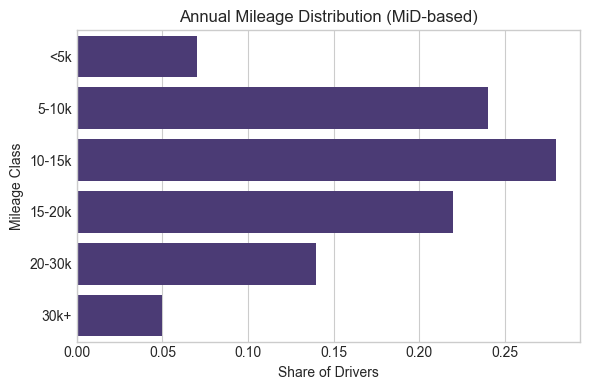

💾 Saved annual_mileage_distribution.csv


In [4]:
# %% ===============================================================
# STEP 3 — ANNUAL MILEAGE DISTRIBUTION (MiD Reference)
# ===============================================================
# Reference Source:
# Mobilität in Deutschland (MiD) dataset, Federal Ministry of Transport.
# Distribution of annual mileage across private car users.
# Approximate class shares and means derived from published summary data.

mileage_classes = ["<5k", "5-10k", "10-15k", "15-20k", "20-30k", "30k+"]
mileage_probs = [0.07, 0.24, 0.28, 0.22, 0.14, 0.05]
mileage_means = [4000, 8000, 12500, 17500, 25000, 35000]

mileage_data = pd.DataFrame({
    "mileage_class": mileage_classes,
    "probability": mileage_probs,
    "mean_km": mileage_means
})

display(mileage_data)

plt.figure(figsize=(6, 4))
sns.barplot(x="probability", y="mileage_class", data=mileage_data)
plt.title("Annual Mileage Distribution (MiD-based)")
plt.xlabel("Share of Drivers")
plt.ylabel("Mileage Class")
plt.tight_layout()
plt.savefig(FIGURES / "annual_mileage_distribution.png")
plt.show()

mileage_data.to_csv(DATA_REF / "annual_mileage_distribution.csv", index=False)
print("💾 Saved annual_mileage_distribution.csv")

,vehicle_type,probability,mean_engine_power_kw,mean_vehicle_age
0,hatchback,0.28,80,6.5
1,sedan,0.32,110,7.0
2,SUV,0.22,140,4.2
3,van,0.10,95,5.5
4,sports,0.08,190,3.1


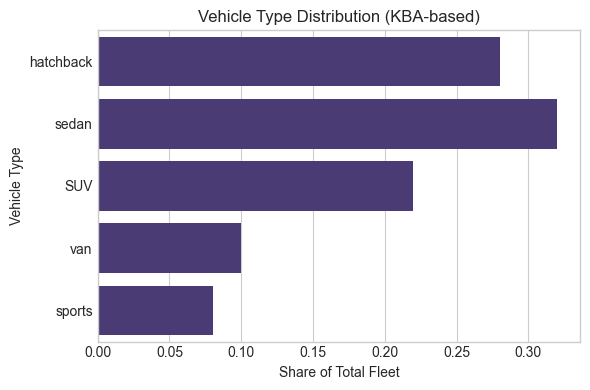

💾 Saved vehicle_type_distribution.csv


In [5]:
# %% ===============================================================
# STEP 4 — VEHICLE TYPE DISTRIBUTION (KBA Reference)
# ===============================================================
# Reference Source:
# Kraftfahrt-Bundesamt (KBA) – Fahrzeugzulassungsstatistik 2023.
# Vehicle type shares, average power, and average age approximated from
# official registration statistics (https://www.kba.de).
#
# The values below are manually constructed proxies for empirical shares
# observed in German passenger car data.

vehicle_data = pd.DataFrame({
    "vehicle_type": ["hatchback", "sedan", "SUV", "van", "sports"],
    "probability": [0.28, 0.32, 0.22, 0.10, 0.08],
    "mean_engine_power_kw": [80, 110, 140, 95, 190],
    "mean_vehicle_age": [6.5, 7.0, 4.2, 5.5, 3.1]
})

display(vehicle_data)

plt.figure(figsize=(6, 4))
sns.barplot(x="probability", y="vehicle_type", data=vehicle_data)
plt.title("Vehicle Type Distribution (KBA-based)")
plt.xlabel("Share of Total Fleet")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.savefig(FIGURES / "vehicle_type_distribution.png")
plt.show()

vehicle_data.to_csv(DATA_REF / "vehicle_type_distribution.csv", index=False)
print("💾 Saved vehicle_type_distribution.csv")

In [6]:
# %% ===============================================================
# STEP 5 — CLAIM FREQUENCY & SEVERITY CALIBRATION (GDV)
# ===============================================================
# Reference Source:
# Gesamtverband der Deutschen Versicherungswirtschaft (GDV) reports 2022–2023.
# Industry-wide claim frequency and average claim amount for motor insurance.
# Used for calibrating the synthetic claim frequency (~8%) and mean severity (~€2700).

claim_stats = pd.DataFrame({
    "segment": ["overall"],
    "mean_claim_frequency": [0.08],
    "mean_severity_eur": [2700],
    "mean_loss_cost_eur": [216]  # freq * severity
})

display(claim_stats)

claim_stats.to_csv(DATA_REF / "claim_stats_reference.csv", index=False)
print("💾 Saved claim_stats_reference.csv")

,segment,mean_claim_frequency,mean_severity_eur,mean_loss_cost_eur
0,overall,0.08,2700,216


💾 Saved claim_stats_reference.csv


In [7]:
# %% ===============================================================
# STEP 6 — REGIONAL VEHICLE MIX ADJUSTMENTS (KBA + intuition)
# ===============================================================

# Relative adjustments (multipliers vs. national average = 1.00)
# Positive bias → higher share of that type; negative bias → lower.
region_vehicle_mix = pd.DataFrame({
    "region": [
        "NW","BY","BW","NI","HE","RP","SN","SH","BE","BB","ST","TH","HH","MV","SL"
    ],
    "hatchback_adj": [1.00,0.95,0.97,1.00,0.98,1.02,1.02,1.00,1.10,1.05,1.03,1.04,1.08,1.03,1.00],
    "sedan_adj":     [1.00,1.00,1.03,0.98,1.02,1.00,0.95,0.98,1.02,0.97,0.96,0.95,1.02,0.97,1.00],
    "SUV_adj":       [0.95,1.10,1.08,0.98,1.00,0.96,0.95,0.98,0.85,0.90,0.92,0.93,0.88,0.92,0.95],
    "van_adj":       [1.00,0.95,0.96,1.05,1.02,1.05,1.08,1.03,0.95,1.02,1.03,1.05,0.95,1.05,1.00],
    "sports_adj":    [1.00,1.05,1.04,0.97,1.00,0.98,0.90,0.95,1.02,0.92,0.93,0.90,1.05,0.93,0.97],
})

display(region_vehicle_mix)

region_vehicle_mix.to_csv(DATA_REF / "region_vehicle_mix_adjustment.csv", index=False)
print("💾 Saved region_vehicle_mix_adjustment.csv")

,region,hatchback_adj,sedan_adj,SUV_adj,van_adj,sports_adj
0,NW,1.00,1.00,0.95,1.00,1.00
1,BY,0.95,1.00,1.10,0.95,1.05
2,BW,0.97,1.03,1.08,0.96,1.04
3,NI,1.00,0.98,0.98,1.05,0.97
4,HE,0.98,1.02,1.00,1.02,1.00
5,RP,1.02,1.00,0.96,1.05,0.98
6,SN,1.02,0.95,0.95,1.08,0.90
7,SH,1.00,0.98,0.98,1.03,0.95
8,BE,1.10,1.02,0.85,0.95,1.02
9,BB,1.05,0.97,0.90,1.02,0.92


💾 Saved region_vehicle_mix_adjustment.csv


In [8]:
# %% ===============================================================
# STEP 6A — REGION FREQUENCY MULTIPLIERS (proxy for GDV Regionalklassen)
# ===============================================================

# Baseline: 1.00 = national average frequency. >1 riskier, <1 safer.
region_freq_adj = pd.DataFrame({
    "region": ["NW","BY","BW","NI","HE","RP","SN","SH","BE","BB","ST","TH","HH","MV","SL"],
    # intuitive pattern: big/urban ↑; rural east ↓; mild shifts elsewhere
    "freq_multiplier": [1.00, 0.97, 1.02, 0.97, 1.01, 0.99, 0.98, 0.98, 1.08, 0.96, 0.96, 0.97, 1.05, 0.96, 0.95],
})

# Normalize to keep weighted national mean = 1.00 (weights = pkw_share)
tmp = region_data.merge(region_freq_adj, on="region", how="left")
weighted_mean = (tmp["pkw_share"] * tmp["freq_multiplier"]).sum() / tmp["pkw_share"].sum()
region_freq_adj["freq_multiplier"] = region_freq_adj["freq_multiplier"] / weighted_mean

display(region_freq_adj)
region_freq_adj.to_csv(DATA_REF / "region_frequency_adj.csv", index=False)
print("💾 Saved region_frequency_adj.csv (centered to 1.00)")

,region,freq_multiplier
0,NW,1.008283
1,BY,0.978035
2,BW,1.028449
3,NI,0.978035
4,HE,1.018366
5,RP,0.998201
6,SN,0.988118
7,SH,0.988118
8,BE,1.088946
9,BB,0.967952


💾 Saved region_frequency_adj.csv (centered to 1.00)


In [ ]:
# %% ===============================================================
# STEP 6B — VEHICLE-TYPE FREQUENCY MULTIPLIERS (proxy for GDV Typklassen)
# ===============================================================

# Baseline: hatchback/van a bit safer; SUV mildly higher; sports highest
vtype_freq_adj = pd.DataFrame({
    "vehicle_type": ["hatchback","sedan","SUV","van","sports"],
    "freq_multiplier": [0.98, 1.00, 1.05, 0.97, 1.25],
})

# Normalize to keep national mean = 1.00 using your vehicle shares
tmp = vehicle_data.merge(vtype_freq_adj, on="vehicle_type", how="left")
weighted_mean = (tmp["probability"] * tmp["freq_multiplier"]).sum()
vtype_freq_adj["freq_multiplier"] = vtype_freq_adj["freq_multiplier"] / weighted_mean

display(vtype_freq_adj)
vtype_freq_adj.to_csv(DATA_REF / "vehicle_frequency_adj.csv", index=False)
print("💾 Saved vehicle_frequency_adj.csv (centered to 1.00)")

,vehicle_type,freq_multiplier
0,hatchback,0.958529
1,sedan,0.978091
2,SUV,1.026995
3,van,0.948748
4,sports,1.222613


💾 Saved vehicle_frequency_adj.csv (centered to 1.00)


In [ ]:
# %% ===============================================================
# STEP 6C — SEVERITY MULTIPLIERS (region & vehicle)
# ===============================================================

# Vehicle severity relativities: sports & SUV costlier; others near 1.00
vtype_sev_adj = pd.DataFrame({
    "vehicle_type": ["hatchback","sedan","SUV","van","sports"],
    "sev_multiplier": [0.97, 1.00, 1.10, 0.96, 1.30],
})
# Normalize by vehicle share so national mean = 1.00
tmp = vehicle_data.merge(vtype_sev_adj, on="vehicle_type", how="left")
weighted_mean = (tmp["probability"] * tmp["sev_multiplier"]).sum()
vtype_sev_adj["sev_multiplier"] = vtype_sev_adj["sev_multiplier"] / weighted_mean
vtype_sev_adj.to_csv(DATA_REF / "vehicle_severity_adj.csv", index=False)

# Region severity relativities: dense/expensive markets mildly ↑
region_sev_adj = pd.DataFrame({
    "region": ["NW","BY","BW","NI","HE","RP","SN","SH","BE","BB","ST","TH","HH","MV","SL"],
    "sev_multiplier": [1.01, 0.99, 1.02, 0.99, 1.02, 0.99, 0.98, 0.99, 1.05, 0.98, 0.98, 0.98, 1.03, 0.98, 0.98],
})
# Normalize by pkw_share to keep national severity mean = 1.00
tmp = region_data.merge(region_sev_adj, on="region", how="left")
weighted_mean = (tmp["pkw_share"] * tmp["sev_multiplier"]).sum() / tmp["pkw_share"].sum()
region_sev_adj["sev_multiplier"] = region_sev_adj["sev_multiplier"] / weighted_mean
region_sev_adj.to_csv(DATA_REF / "region_severity_adj.csv", index=False)

print("💾 Saved vehicle_severity_adj.csv and region_severity_adj.csv (both centered to 1.00)")

💾 Saved vehicle_severity_adj.csv and region_severity_adj.csv (both centered to 1.00)


In [11]:
# %% ===============================================================
# STEP 7 — SUMMARY AND NEXT STEPS
# ===============================================================

print("""
✅ Reference data summary complete.
All reference CSVs saved to data/reference/.
These files will serve as priors for src/ins/simulate_data.py.
Next notebook: 02_data_simulation.ipynb
""")


✅ Reference data summary complete.
All reference CSVs saved to data/reference/.
These files will serve as priors for src/ins/simulate_data.py.
Next notebook: 02_data_simulation.ipynb

